In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_ta as ta
from ta.utils import dropna
import pyfolio as pf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

D:\Anaconda\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Using yfinance to collect data

In [3]:
df = yf.download("TCS",start = "2020-06-01", end="2022-07-30")
df1 = df.copy()
df1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-01,2.93,3.19,2.85,3.03,3.03,227900
2020-06-02,3.10,3.26,2.93,2.99,2.99,285600
2020-06-03,3.20,3.25,3.11,3.13,3.13,248900
2020-06-04,3.05,3.36,3.04,3.25,3.25,186000
2020-06-05,3.48,3.80,3.45,3.64,3.64,405100
...,...,...,...,...,...,...
2022-07-25,7.36,7.41,7.14,7.37,7.37,510400
2022-07-26,7.25,7.25,6.87,7.05,7.05,506900
2022-07-27,7.17,7.37,7.00,7.30,7.30,376900


In [3]:
type(df1.dtypes)

pandas.core.series.Series

In [ ]:
#del df

Feature Engineering

In [44]:
help(ta.vwap)

Help on function vwap in module pandas_ta.overlap.vwap:

vwap(high, low, close, volume, anchor=None, offset=None, **kwargs)
    Volume Weighted Average Price (VWAP)
    
    The Volume Weighted Average Price that measures the average typical price
    by volume.  It is typically used with intraday charts to identify general
    direction.
    
    Sources:
        https://www.tradingview.com/wiki/Volume_Weighted_Average_Price_(VWAP)
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/volume-weighted-average-price-vwap/
        https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:vwap_intraday
    
    Calculation:
        tp = typical_price = hlc3(high, low, close)
        tpv = tp * volume
        VWAP = tpv.cumsum() / volume.cumsum()
    
    Args:
        high (pd.Series): Series of 'high's
        low (pd.Series): Series of 'low's
        close (pd.Series): Series of 'close's
        volume (pd.Series): Series of 'volume'

In [45]:
def features(df1,short,long):
    df1.ta.adjusted = "Adj Close"

    bbands=df1.ta.bbands(length=short,std=2,append=True)
    df1['SMA_short'] = df1.ta.sma(length=short)
    df1['SMA_short_prev'] = df1['SMA_short'].shift()
    df1['SMA_long'] = df1.ta.sma(length=long)
    df1['SMA_long_prev'] = df1['SMA_long'].shift()

    df1['vwap'] = df1.ta.vwap()
    df1['rsi'] = df1.ta.rsi(length=short)
    df1['atr'] = df1.ta.atr(length=short)
    df1['cci'] = df1.ta.cci(length=short)
    #Stoploss and Takeprofit
    df1['TP'] = df1['Open'].shift() + 0.04*df1['Open'].shift()
    df1['SL'] = df1['Close'].shift() - 0.02*df1['Close'].shift()
    #df1.drop(df1.iloc[:, 7:16], inplace = True, axis = 1)


In [129]:
del df1
df1 = df.copy()
features(df1,70,100)
df1

,Open,High,Low,Close,Adj Close,Volume,BBL_70_2.0,BBM_70_2.0,BBU_70_2.0,BBB_70_2.0,...,SMA_short,SMA_short_prev,SMA_long,SMA_long_prev,vwap,rsi,atr,cci,TP,SL
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,2.93,3.19,2.85,3.03,3.03,227900,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.023333,NaN,NaN,NaN,NaN,NaN
2020-06-02,3.10,3.26,2.93,2.99,2.99,285600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.060000,NaN,NaN,NaN,3.0472,2.9694
2020-06-03,3.20,3.25,3.11,3.13,3.13,248900,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.163333,NaN,NaN,NaN,3.2240,2.9302
2020-06-04,3.05,3.36,3.04,3.25,3.25,186000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.216667,NaN,NaN,NaN,3.3280,3.0674
2020-06-05,3.48,3.80,3.45,3.64,3.64,405100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.630000,NaN,NaN,NaN,3.1720,3.1850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,7.36,7.41,7.14,7.37,7.37,510400,6.361556,7.345000,8.328444,26.778606,...,7.345000,7.349857,7.6057,7.6184,7.306667,47.253830,0.407203,-7.015066,7.6648,7.1736
2022-07-26,7.25,7.25,6.87,7.05,7.05,506900,6.363485,7.329000,8.294515,26.347789,...,7.329000,7.345000,7.5903,7.6057,7.056667,46.249182,0.408529,-46.974848,7.6544,7.2226
2022-07-27,7.17,7.37,7.00,7.30,7.30,376900,6.377022,7.315000,8.252978,25.645332,...,7.315000,7.329000,7.5761,7.5903,7.223333,47.139908,0.407979,-16.736398,7.5400,6.9090


In [130]:
df1.dtypes

Open              float64
High              float64
Low               float64
Close             float64
Adj Close         float64
Volume              int64
BBL_70_2.0        float64
BBM_70_2.0        float64
BBU_70_2.0        float64
BBB_70_2.0        float64
BBP_70_2.0        float64
SMA_short         float64
SMA_short_prev    float64
SMA_long          float64
SMA_long_prev     float64
vwap              float64
rsi               float64
atr               float64
cci               float64
TP                float64
SL                float64
dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


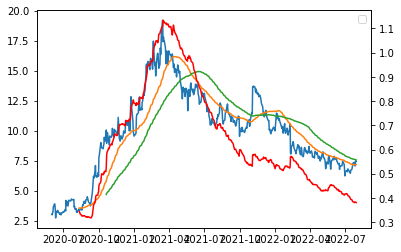

In [94]:

fig,ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(df1[['Adj Close','SMA_short','SMA_long']])
ax1.plot(df1[['atr']],color = "red")
ax.legend()
#plt.fig(figsize=(15,25))

In [95]:
#help(ta.atr)
#df1.drop(df1.columns[[17]],axis=1,inplace=True)
#df1.head(20)

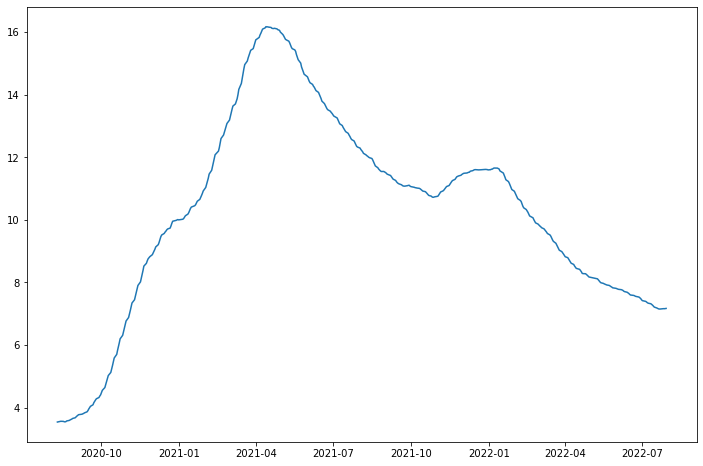

In [96]:
fig = plt.figure(figsize=(12,8))
plt.plot(df1["SMA_short"])

In [97]:
ma_features=list(['SMA_short','SMA_long','rsi','atr'])
vol_features = list(['atr'])

In [83]:
df1[ma_features].corr()

,SMA_short,SMA_long,rsi,atr
SMA_short,1.000000,0.737642,-0.177318,0.803495
SMA_long,0.737642,1.000000,-0.411850,0.283237
rsi,-0.177318,-0.411850,1.000000,0.281651
atr,0.803495,0.283237,0.281651,1.000000


Different approach to make the strategy but not following this : 

In [84]:
CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 14,70, BBANDS, RSI, MACD and Volume SMA 20",
    ta=[
        #{"kind": "sma", "length": 14},
        {"kind": "sma", "length": 70},
        {"kind": "bbands", "length": 14},
        #{"kind": "rsi"},
        {"kind": "macd", "fast": 8, "slow": 21},
       # {"kind": "sma", "close": "volume", "length": 20, "prefix": "VOLUME"},
    ]
)
#df1['SMA_14_prev'] = df1['SMA_14'].shift()
#df1['SMA_70_prev'] = df1['SMA_70'].shift()
# To run your "Custom Strategy"
df1.ta.strategy(CustomStrategy)

In [85]:
CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 14,70, BBANDS, RSI, MACD and Volume SMA 20",
    ta=[
        {"kind": "sma", "short": 14},
        {"kind": "sma", "long": 70},
        {"kind": "bbands", "long": 14},
        #{"kind": "rsi"},
        {"kind": "macd", "fast": 8, "slow": 21},
       # {"kind": "sma", "close": "volume", "length": 20, "prefix": "VOLUME"},
    ]
)
#df1['SMA_14_prev'] = df1['SMA_14'].shift()
#df1['SMA_70_prev'] = df1['SMA_70'].shift()
# To run your "Custom Strategy"
df2.ta.strategy(CustomStrategy,short=10,long=30)

NameError: name 'df2' is not defined

In [185]:
df1['SL'].std()

3.5105411352239106

In [218]:
df2 = df1.copy()

In [ ]:
#df1.ta.strategy(CustomStrategy)

Creating signals and position

In [210]:
df1['signal'] = np.where(((df1['SMA_short'] > df1['SMA_long']) & (df1['SMA_short_prev'] < df1['SMA_long_prev'])) | 
                         ((df1['rsi']<df1['rsi'].shift()) & df1['rsi']<70) | 
                         (df1['atr']+df1['Close'].shift()>df1['Close']) | 
                          (df1['cci']>100)|df1['Open']<df1['vwap']  , 1, 0)
df1['signal'] = np.where(((df1['SMA_short'] < df1['SMA_long']) 
                        & (df1['SMA_short_prev'] > df1['SMA_long_prev'])) |(df1['SL']+0.04*df1['SL']<df1['Close'])
                            , -1, df1['signal'])
df1['signal'].value_counts()

 1    378
-1    168
Name: signal, dtype: int64

In [211]:
df1['position'] = df1['signal'].replace(to_replace=0, method='ffill')

In [133]:
df1 = df1.astype({"signal":'float', "position":'float'}) 
df1.dtypes

Open              float64
High              float64
Low               float64
Close             float64
Adj Close         float64
Volume              int64
BBL_70_2.0        float64
BBM_70_2.0        float64
BBU_70_2.0        float64
BBB_70_2.0        float64
BBP_70_2.0        float64
SMA_short         float64
SMA_short_prev    float64
SMA_long          float64
SMA_long_prev     float64
vwap              float64
rsi               float64
atr               float64
cci               float64
TP                float64
SL                float64
signal            float64
position          float64
dtype: object

In [212]:
df1['bnh_returns'] = np.log(df1['Adj Close'] / df1['Adj Close'].shift(1))

# Strategy returns 
df1['strategy_returns'] = df1['bnh_returns'] * df1['position'].shift(1)

Start date,2020-06-01
End date,2022-07-29
Total months,26
,Backtest
Annual return,78.1%
Cumulative returns,249.4%
Annual volatility,75.3%
Sharpe ratio,1.14
Calmar ratio,1.70
Stability,0.53
Max drawdown,-45.8%


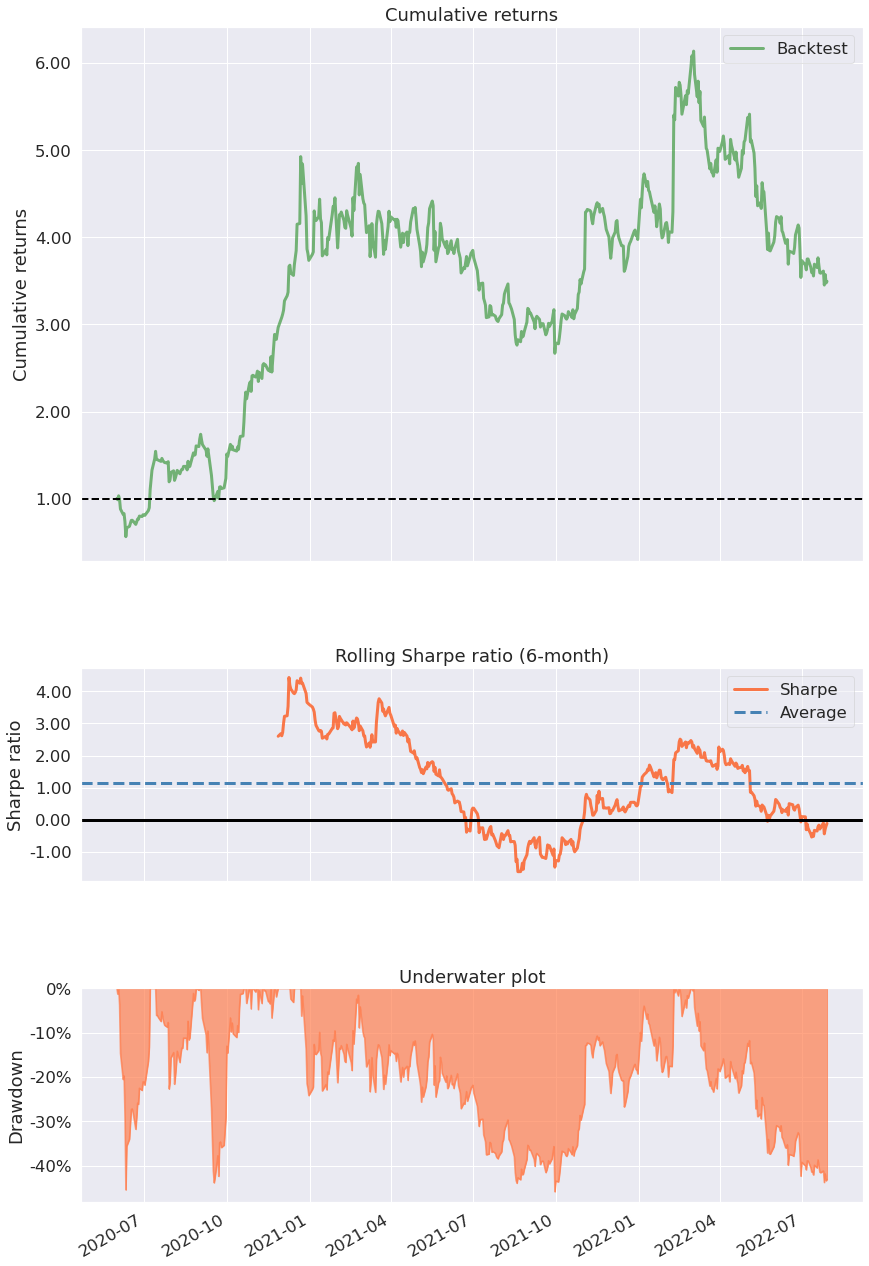

In [213]:
pf.create_simple_tear_sheet(df1['strategy_returns'])

### Machine Learning

In [224]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,log_loss,precision_score,roc_auc_score,confusion_matrix,mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn import utils
from sklearn.decomposition import PCA


In [83]:
df2 = df1.copy()
df2.tail()

,Open,High,Low,Close,Adj Close,Volume,BBL_7_2.0,BBM_7_2.0,BBU_7_2.0,BBB_7_2.0,...,SMA_long,SMA_long_prev,rsi,atr,TP,SL,signal,position,bnh_returns,strategy_returns
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-25,7.36,7.41,7.14,7.37,7.37,510400,6.578750,7.085714,7.592678,14.309463,...,6.859048,6.850476,74.543053,0.286912,7.6648,7.1736,-1,-1,0.006807,-0.006807
2022-07-26,7.25,7.25,6.87,7.05,7.05,506900,6.732321,7.135714,7.539108,11.306331,...,6.839524,6.859048,52.144106,0.317353,7.6544,7.2226,1,1,-0.044390,0.044390
2022-07-27,7.17,7.37,7.00,7.30,7.30,376900,6.930730,7.211429,7.492127,7.784831,...,6.841905,6.839524,62.432916,0.324874,7.5400,6.9090,-1,-1,0.034847,0.034847
2022-07-28,7.34,7.50,7.14,7.50,7.50,273600,7.014241,7.285714,7.557188,7.452215,...,6.856667,6.841905,68.711369,0.329892,7.4568,7.1540,-1,-1,0.027029,-0.027029
2022-07-29,7.50,7.59,7.29,7.46,7.46,362400,7.060397,7.330000,7.599603,7.356146,...,6.890476,6.856667,66.132456,0.325622,7.6336,7.3500,-1,-1,-0.005348,0.005348


In [219]:
correlated_features = set()
corr_matrix = df2.corr()

In [220]:
for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) < 0.8:
            colname = corr_matrix.columns[i]
            non_correlated_features.add(colname)
print(non_correlated_features)


{'TP', 'BBM_70_2.0', 'SMA_long', 'rsi', 'cci', 'bnh_returns', 'SMA_short', 'BBL_70_2.0', 'SMA_long_prev', 'SL', 'BBP_70_2.0', 'vwap', 'BBB_70_2.0', 'BBU_70_2.0', 'position', 'Volume', 'atr', 'strategy_returns', 'signal', 'SMA_short_prev'}


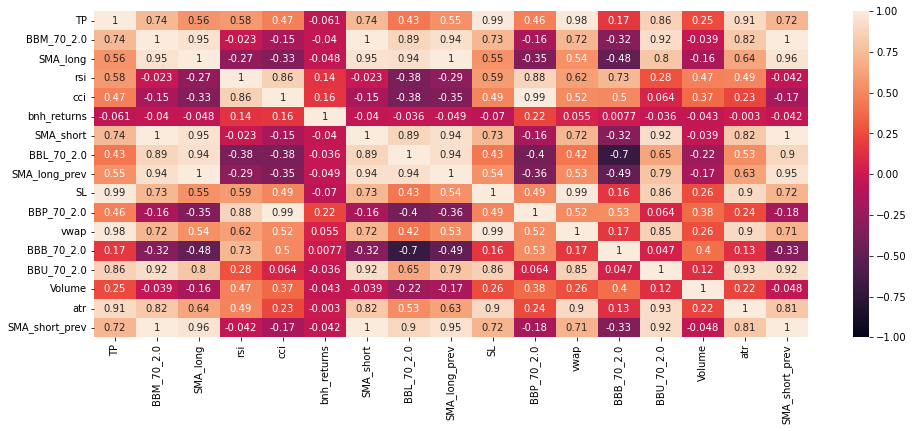

In [240]:

corr_df = df1[['TP', 'BBM_70_2.0', 'SMA_long', 'rsi', 'cci', 'bnh_returns', 'SMA_short', 'BBL_70_2.0', 
         'SMA_long_prev', 'SL', 'BBP_70_2.0', 'vwap', 'BBB_70_2.0', 'BBU_70_2.0', 
         'Volume', 'atr', 'SMA_short_prev']].copy()
corr_df_matrix = corr_df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_df.corr(), vmin=-1, vmax=1, annot=True)

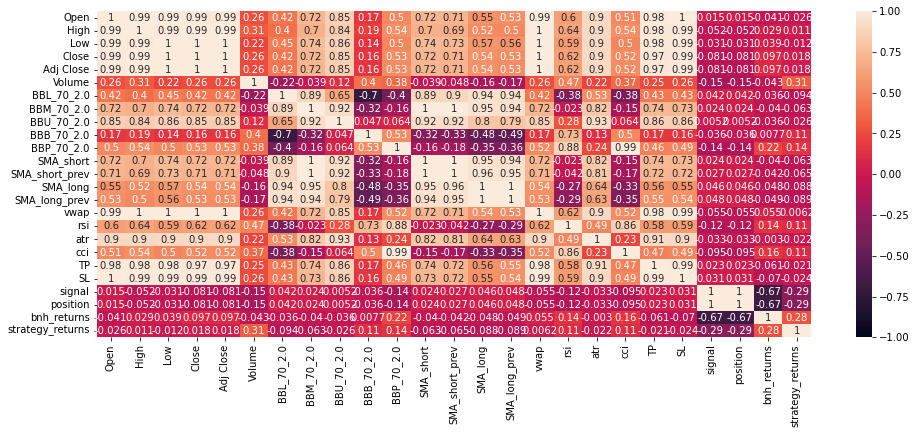

In [215]:
corr = df1.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)

In [222]:

df1.dropna(inplace=True)
X = df1[['TP', 'BBM_70_2.0', 'SMA_long', 'rsi', 'cci', 'bnh_returns', 'SMA_short', 'BBL_70_2.0', 
         'SMA_long_prev', 'SL', 'BBP_70_2.0', 'vwap', 'BBB_70_2.0', 'BBU_70_2.0', 
         'Volume', 'atr', 'SMA_short_prev']]

        

Y = df1[['position']]
X

,TP,BBM_70_2.0,SMA_long,rsi,cci,bnh_returns,SMA_short,BBL_70_2.0,SMA_long_prev,SL,BBP_70_2.0,vwap,BBB_70_2.0,BBU_70_2.0,Volume,atr,SMA_short_prev
Date,,,,,,,,,,,,,,,,,
2020-10-21,9.6408,5.338571,4.7470,62.851852,169.012790,-0.115919,5.338571,1.232272,4.6878,9.8490,0.939742,9.923333,153.835139,9.444871,6739000,0.515172,5.267143
2020-10-22,11.6584,5.414429,4.8122,64.044234,132.089940,0.060690,5.414429,1.200294,4.7470,8.7710,0.985933,9.100000,155.663145,9.628563,2084600,0.526241,5.338571
2020-10-23,9.1208,5.495000,4.8793,64.721199,151.119264,0.034112,5.495000,1.162810,4.8122,9.3198,1.001478,9.850000,157.677530,9.827190,1843500,0.528438,5.414429
2020-10-26,9.9008,5.565571,4.9380,62.131911,125.626039,-0.075986,5.565571,1.161025,4.8793,9.6432,0.903495,9.280000,158.278322,9.970118,1444000,0.539174,5.495000
2020-10-27,10.1712,5.638429,4.9940,62.386346,118.148933,0.013072,5.638429,1.162473,4.9380,8.9376,0.902324,9.206666,158.766066,10.114384,883600,0.538615,5.565571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,7.6648,7.345000,7.6057,47.253830,-7.015066,0.006807,7.345000,6.361556,7.6184,7.1736,0.512710,7.306667,26.778606,8.328444,510400,0.407203,7.349857
2022-07-26,7.6544,7.329000,7.5903,46.249182,-46.974848,-0.044390,7.329000,6.363485,7.6057,7.2226,0.355518,7.056667,26.347789,8.294515,506900,0.408529,7.345000
2022-07-27,7.5400,7.315000,7.5761,47.139908,-16.736398,0.034847,7.315000,6.377022,7.5903,6.9090,0.492004,7.223333,25.645332,8.252978,376900,0.407979,7.329000


In [ ]:
#trying to remove correlated features but only remaining columns are atr, close

#for name,values in X.iteritems():   
#    for j in correlated_features:
#        if name == j:
#            X.drop(labels=j, axis=1, inplace=True)

In [226]:
# Training dataset length
split = int(len(df1) * 0.75)

# Splitting the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = Y[:split], Y[split:]

scaler = StandardScaler()
scaler.fit(X_train)
#scaler1  = StandardScaler()
#scaler1.fit(y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#y_train = scaler.transform(y_train)
#y_test = scaler1.transform(y_test)
regr = linear_model.LinearRegression()
rfr = RandomForestRegressor(random_state=5)
#model = clf.fit(X_train, y_train)


In [ ]:
#print(X_train)

In [ ]:
#y_train, y_test

In [227]:

regr.fit(X_train, y_train)

LinearRegression()

In [228]:
y_regr_pred = regr.predict(X_test)


In [230]:
regr_mse = mean_squared_error(y_test, y_regr_pred)
regr_rmse = regr_mse**.5
regr_r2_score = r2_score(y_test, y_regr_pred)
print(regr_mse)
print(regr_rmse)
print(regr_r2_score)

0.47809220741995734
0.6914421215256974
0.42489560319563224


In [231]:
rfr.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=5)

In [233]:
y_rfr_pred = rfr.predict(X_test)
rfr_mse = mean_squared_error(y_test, y_rfr_pred)
rfr_rmse = rfr_mse**.5
rfr_r2_score = r2_score(y_test, y_rfr_pred)
print(rfr_mse)
print(rfr_rmse)
print(rfr_r2_score)

0.05214642857142857
0.22835592519448356
0.9372722669735327


Hyperparameter tuning

In [238]:
# Number of trees how to 
rfr_ntrees = [int(x) for x in np.linspace(200, 2000, 5)]

# Maximum number of levels in tree
rfr_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rfr_max_depth.append(None)

# Number of features to consider at every split
rfr_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rfr_criterion = ['mse', 'mae','rmse']

# Minimum number of samples required to split a node
rfr_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]


# Method of selecting samples for training each tree
rfr_bootstrap = [True, False]

# Create the grid
rfr_grid = {'n_estimators': rfr_ntrees,
               'max_depth': rfr_max_depth,
               'max_features': rfr_max_features,
               'criterion': rfr_criterion,
               'min_samples_split': rfr_min_samples_split,
               'bootstrap': rfr_bootstrap}
rfr_ntrees

[200, 650, 1100, 1550, 2000]

In [239]:
# Create the random search Random Forest
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = rfr_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
rfr_random.fit(X_train, y_train.values.ravel())

# View the best parameters from the random search
rfr_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'n_estimators': 650,
 'min_samples_split': 6,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'mae',
 'bootstrap': False}

In [242]:
rfr_final = RandomForestRegressor(n_estimators = 650,
                                 min_samples_split = 6,
                                 min_impurity_decrease = 0.0,
                                 max_features = 'auto',
                                 max_depth = 5,
                                 criterion = 'mae',
                                 bootstrap = False,
                                 )
rfr_final.fit(X_train, y_train.values.ravel())
yfin_rfr_pred = rfr_final.predict(X_test)
rfr_final_mse = mean_squared_error(y_test, yfin_rfr_pred)
rfr_final_rmse = rfr_final_mse**.5
rfr_final_r2_score = r2_score(y_test, yfin_rfr_pred)
print(rfr_mse)
print(rfr_rmse)
print(rfr_final_r2_score)

0.05214642857142857
0.22835592519448356
0.9570305054893176


In [ ]:
#PCA

In [243]:
pca = PCA(n_components = 2)
pca.fit(X_train)
x_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not             position
Date                
2020-06-30        -1
2020-07-01        -1
2020-07-02        -1
2020-07-06        -1
2020-07-07         1
...              ...
2022-01-12         1
2022-01-13        -1
2022-01-14        -1
2022-01-18         1
2022-01-19        -1

[393 rows x 1 columns]

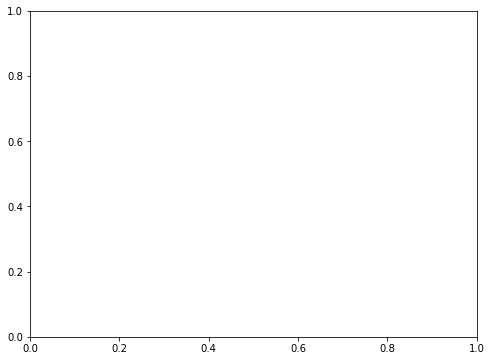

In [110]:
plt.figure(figsize =(8, 6))
  
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c = y_train, cmap ='plasma')
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [244]:
rfr.fit(x_train_pca, y_train.values.ravel())

RandomForestRegressor(random_state=5)

In [246]:
y_rfr_pred_pca = rfr.predict(x_test_pca)
rfr_mse_pca = mean_squared_error(y_test, y_rfr_pred)
rfr_rmse_pca = rfr_mse_pca**.5
rfr_r2_score_pca = r2_score(y_test, y_rfr_pred)
print(rfr_mse_pca)
print(rfr_rmse_pca)
print(rfr_r2_score_pca)

0.05214642857142857
0.22835592519448356
0.9372722669735327


In [247]:
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return scores

In [248]:
final_scores = final_comparison([regr, rfr_final], X_test, y_test.values.ravel())

# Adjust the column headers
final_scores.columns  = ['Linear Regression', 'Random Forest']
final_scores

,Linear Regression,Random Forest
Mean Absolute Error,0.5740,0.0181
Mean Squared Error,0.4781,0.0357
R^2,0.4249,0.9570
Accuracy,104.1261,101.7610


(array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]),
 array([-7.7228832 , -6.12994675, -4.53701029, -2.94407384, -1.35113739,
         0.24179906,  1.83473551,  3.42767197,  5.02060842,  6.61354487,
  

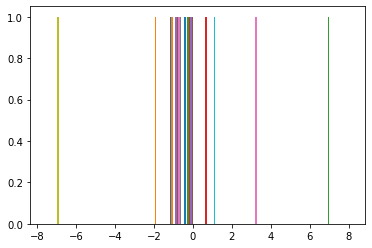

In [249]:
importance = regr.coef_
plt.hist(importance)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [ ]:
y_sl = df1.SL
y_tp = df1.TP
y_pos = df1.position

In [ ]:
y_sl_train, y_sl_test = y_sl[:split], y_sl[split:]
y_tp_train, y_tp_test = y_tp[:split], y_tp[split:]

In [ ]:
X_train.shape[1]
X_train.shape[0]

In [ ]:

model = Sequential()
model.add(LSTM(50,input_shape=(X_train.shape[0], X_train.shape[1])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
train_size, val_size = 0.5, 0.2

def preprocess(data_array: np.ndarray, train_size: float, val_size: float):
    num_time_steps = data_array.shape[0]
    num_train, num_val = (
        int(num_time_steps * train_size),
        int(num_time_steps * val_size),
    )
    train_array = data_array[:num_train]
    mean, std = train_array.mean(axis=0), train_array.std(axis=0)

    train_array = (train_array - mean) / std
    val_array = (data_array[num_train : (num_train + num_val)] - mean) / std
    test_array = (data_array[(num_train + num_val) :] - mean) / std

    return train_array, val_array, test_array


train_array, val_array, test_array = preprocess(X, train_size, val_size)

print(f"train set size: {train_array.shape}")
print(f"validation set size: {val_array.shape}")
print(f"test set size: {test_array.shape}")    